<a href="https://colab.research.google.com/github/aryairfnd/Decision-Tree/blob/main/Glass_Type_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np  # linear algebra
import pandas as pd  # read and wrangle dataframes
import matplotlib.pyplot as plt # visualization
import seaborn as sns # statistical visualizations and aesthetics
from sklearn.base import TransformerMixin # To create new classes for transformations
from sklearn.preprocessing import (FunctionTransformer, StandardScaler) # preprocessing
from sklearn.decomposition import PCA # dimensionality reduction
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from scipy.stats import boxcox # data transform
from sklearn.model_selection import (train_test_split, KFold , StratifiedKFold,
                                     cross_val_score, GridSearchCV,
                                     learning_curve, validation_curve) # model selection modules
from sklearn.pipeline import Pipeline # streaming pipelines
from sklearn.base import BaseEstimator, TransformerMixin # To create a box-cox transformation class
from collections import Counter
import warnings
# load models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import (XGBClassifier, plot_importance)
from sklearn.svm import SVC
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from time import time

%matplotlib inline
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [ ]:
df = pd.read_csv('glass.csv')
features = df.columns[:-1].tolist()
print(features)
print(df.shape)

['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
(214, 10)


In [ ]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [ ]:
df.dtypes

,0
RI,float64
Na,float64
Mg,float64
Al,float64
Si,float64
K,float64
Ca,float64
Ba,float64
Fe,float64
Type,int64


In [ ]:
df['Type'].value_counts()

,count
Type,
2,76
1,70
7,29
3,17
5,13
6,9


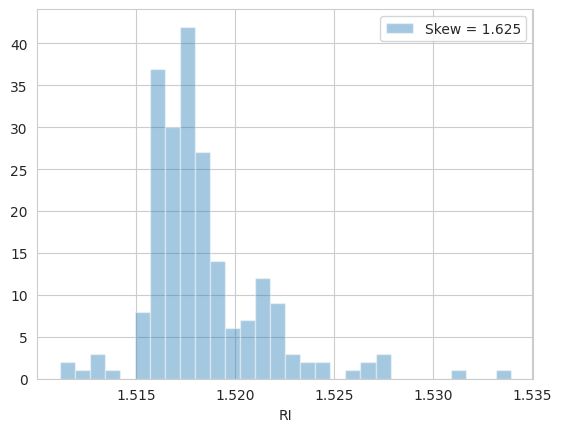

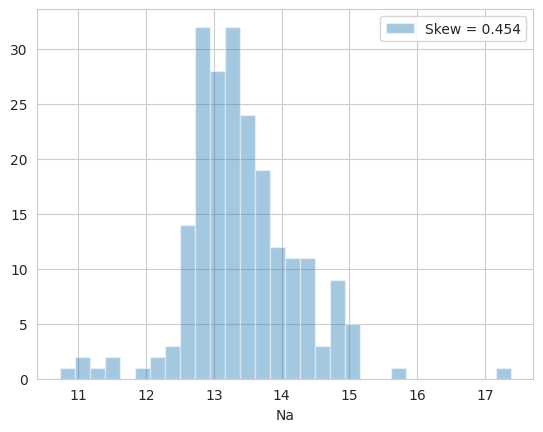

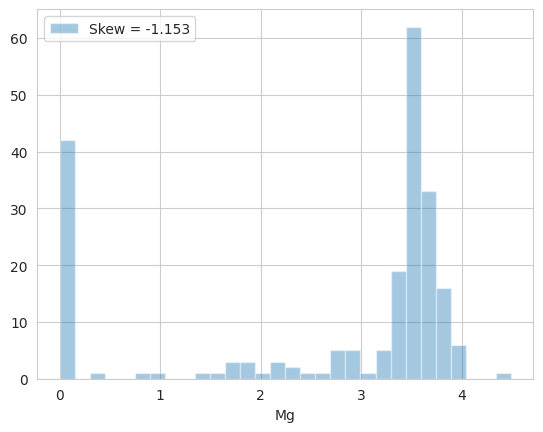

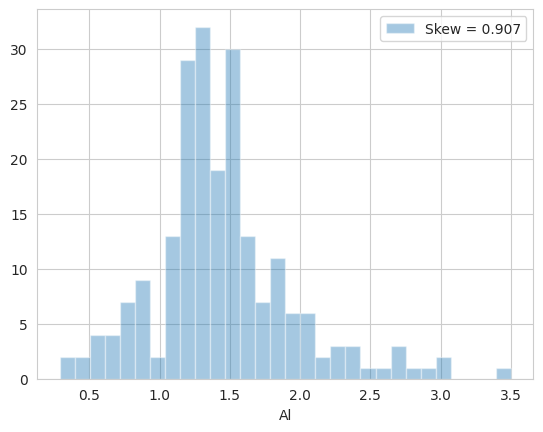

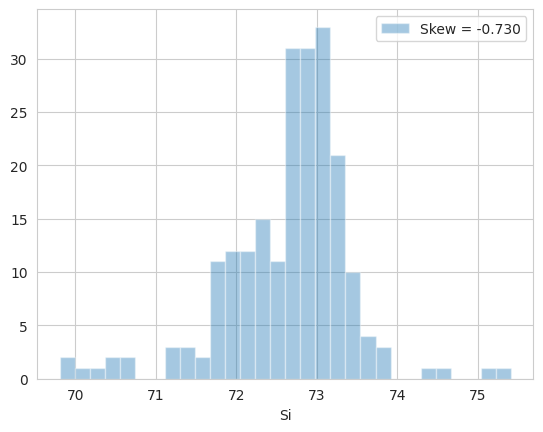

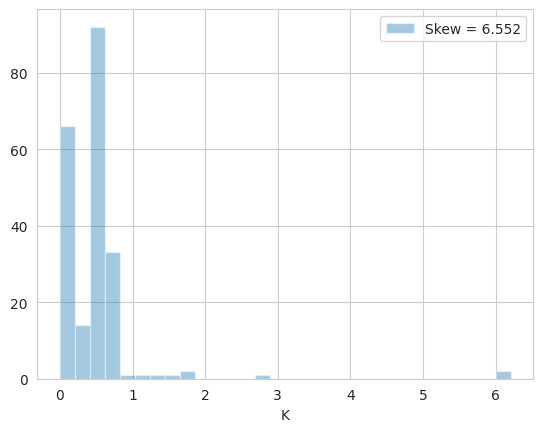

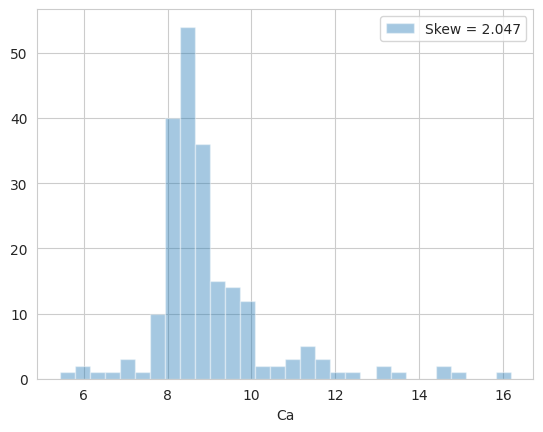

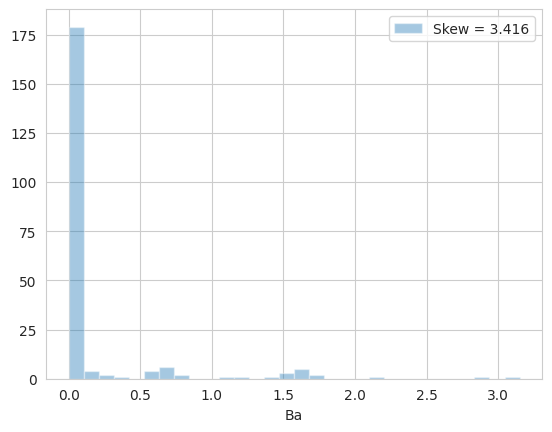

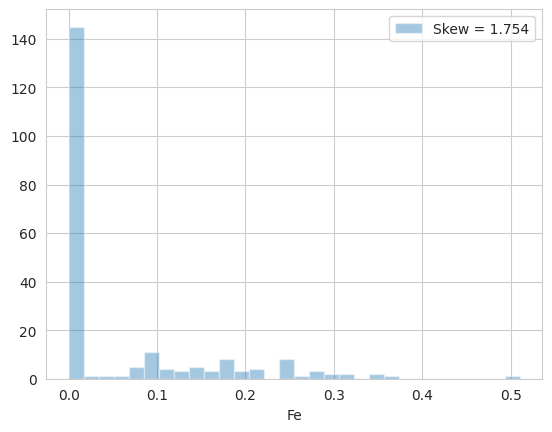

In [ ]:
for feat in features:
    skew = df[feat].skew()
    sns.distplot(df[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

In [ ]:
# Detect observations with more than one outlier

def outlier_hunt(df):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers.
    """
    outlier_indices = []

    # iterate over features(columns)
    for col in df.columns.tolist():
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)

        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)

        # Interquartile rrange (IQR)
        IQR = Q3 - Q1

        # outlier step
        outlier_step = 1.5 * IQR

        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index

        # append the found outlier indices for col to the list of outlier indices
        outlier_indices.extend(outlier_list_col)

    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )

    return multiple_outliers

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(df[features]))))

The dataset contains 14 observations with more than 2 outliers


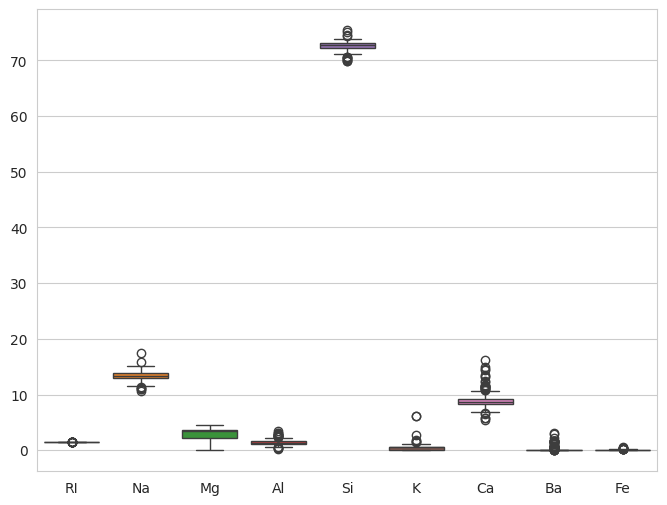

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(df[features])
plt.show()

<Figure size 800x800 with 0 Axes>

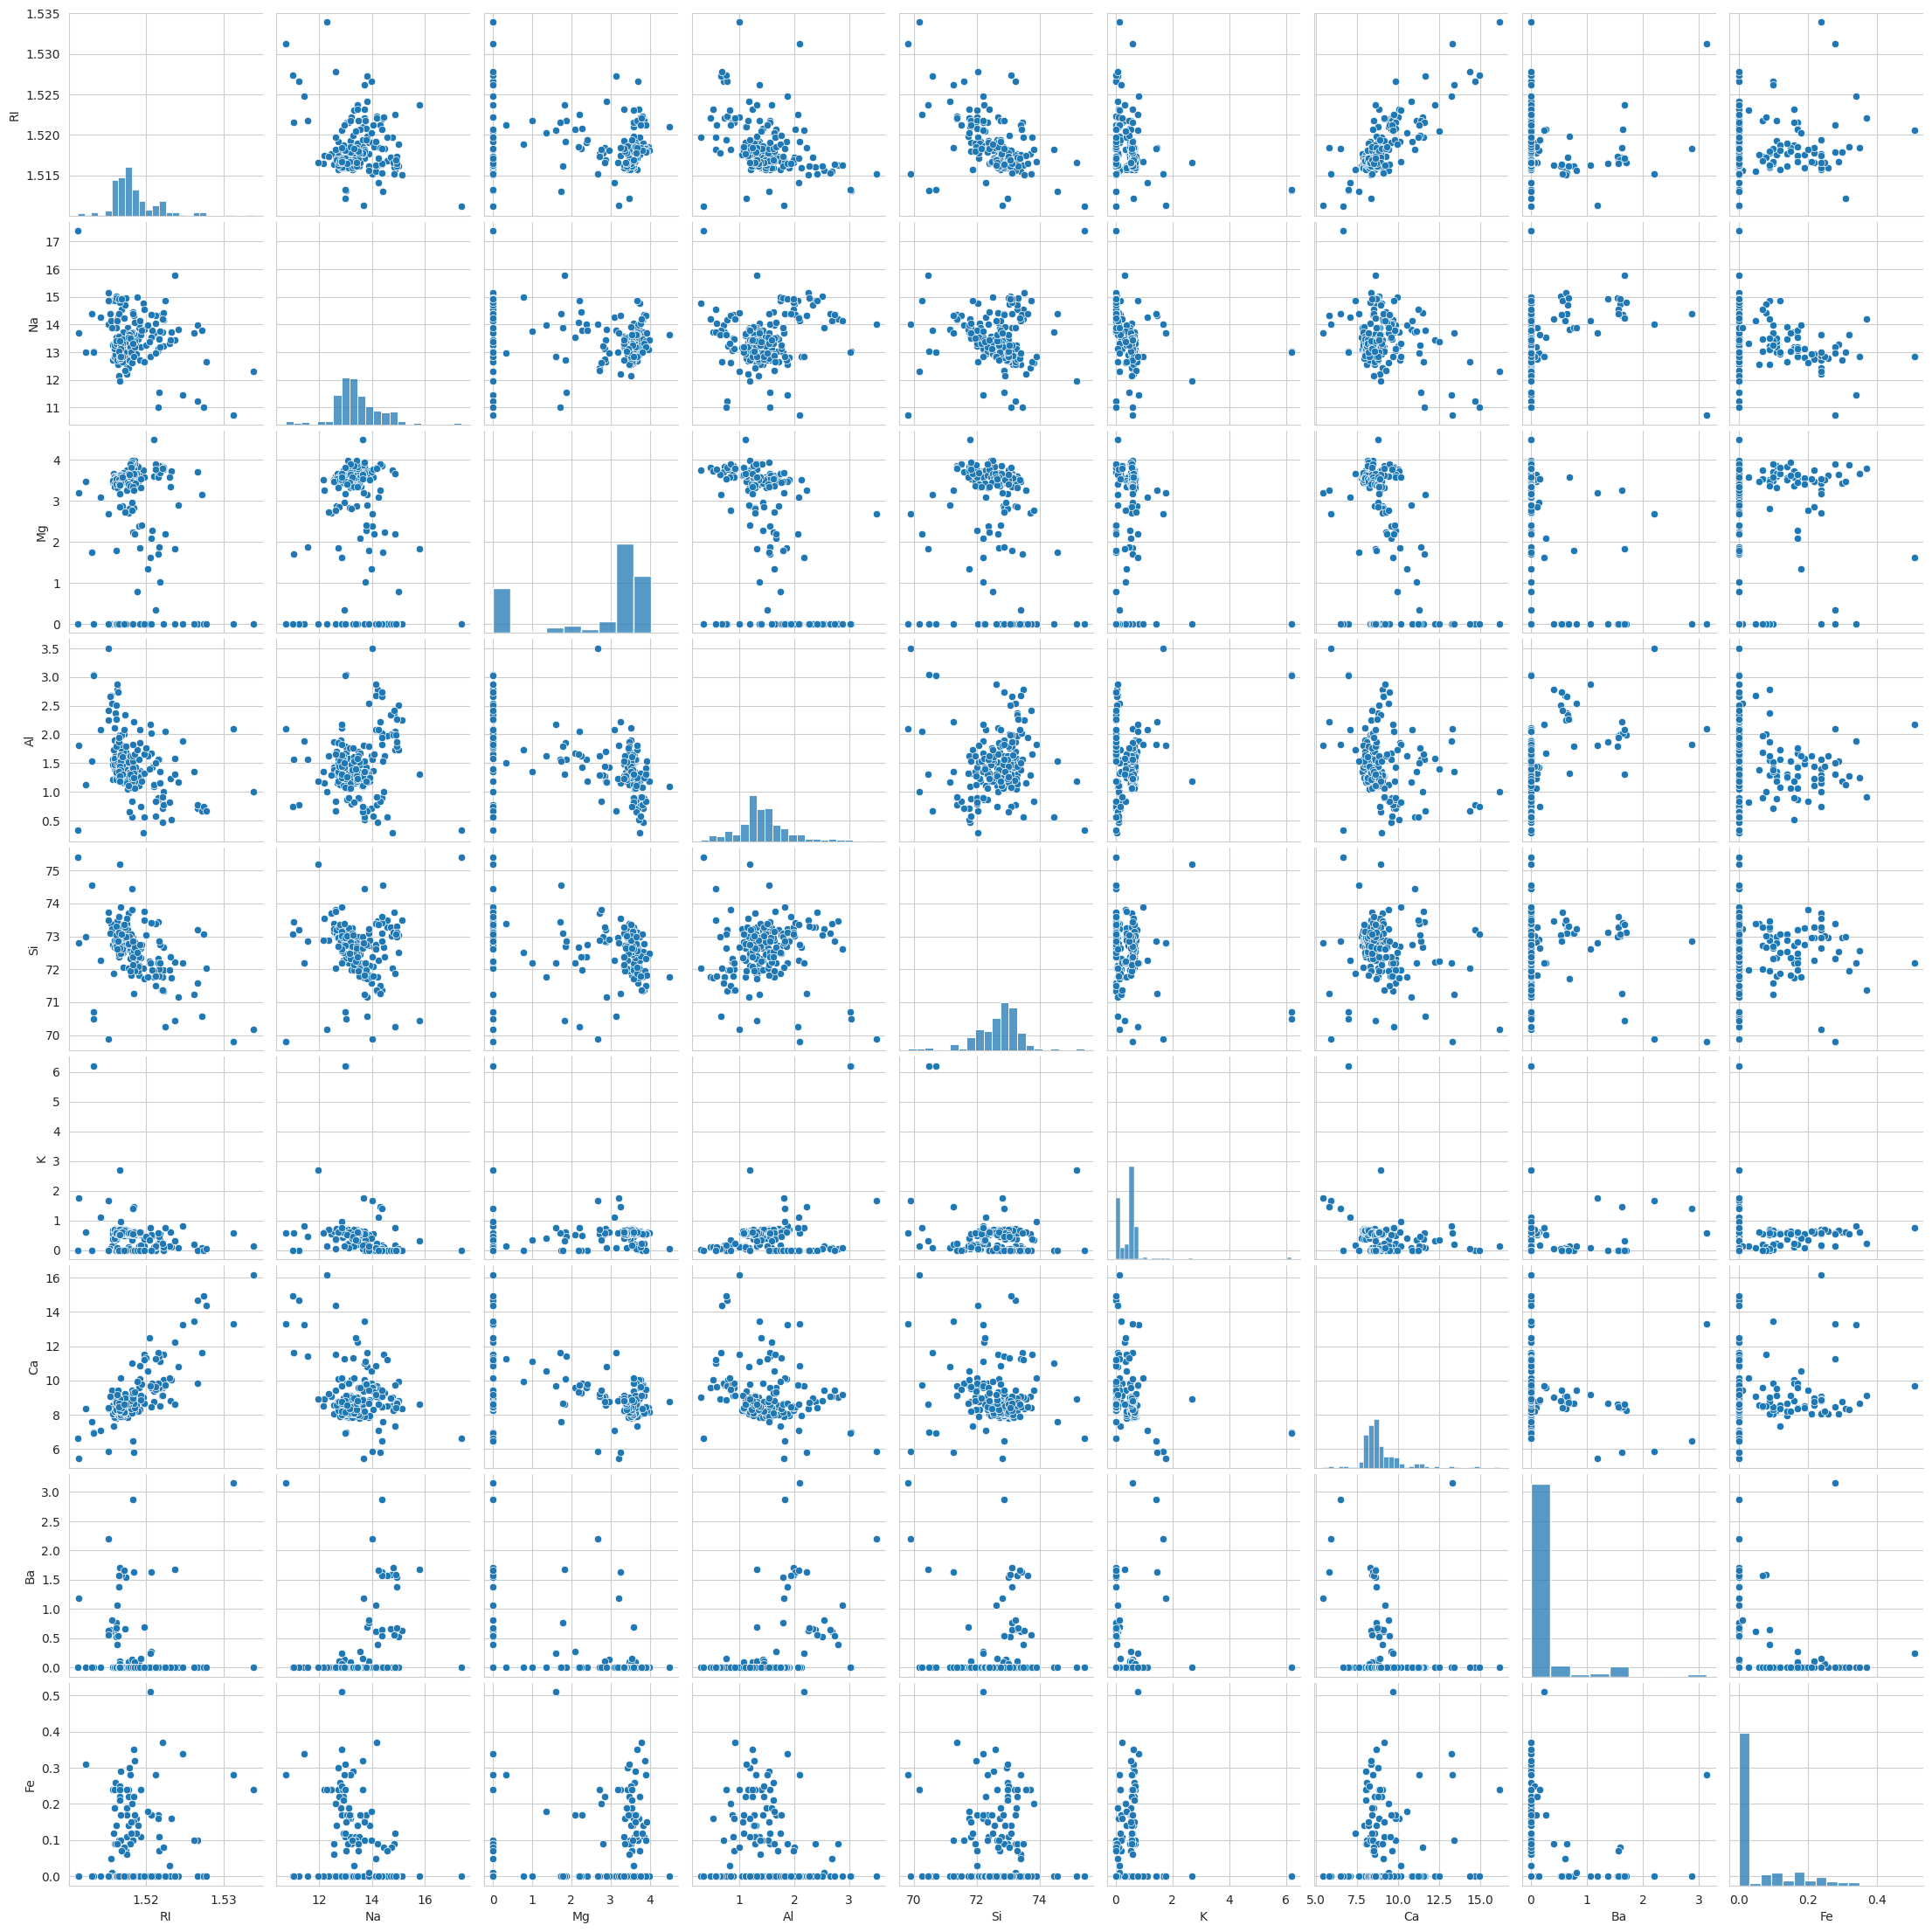

In [ ]:
plt.figure(figsize=(8,8))
sns.pairplot(df[features],palette='coolwarm')
plt.show()

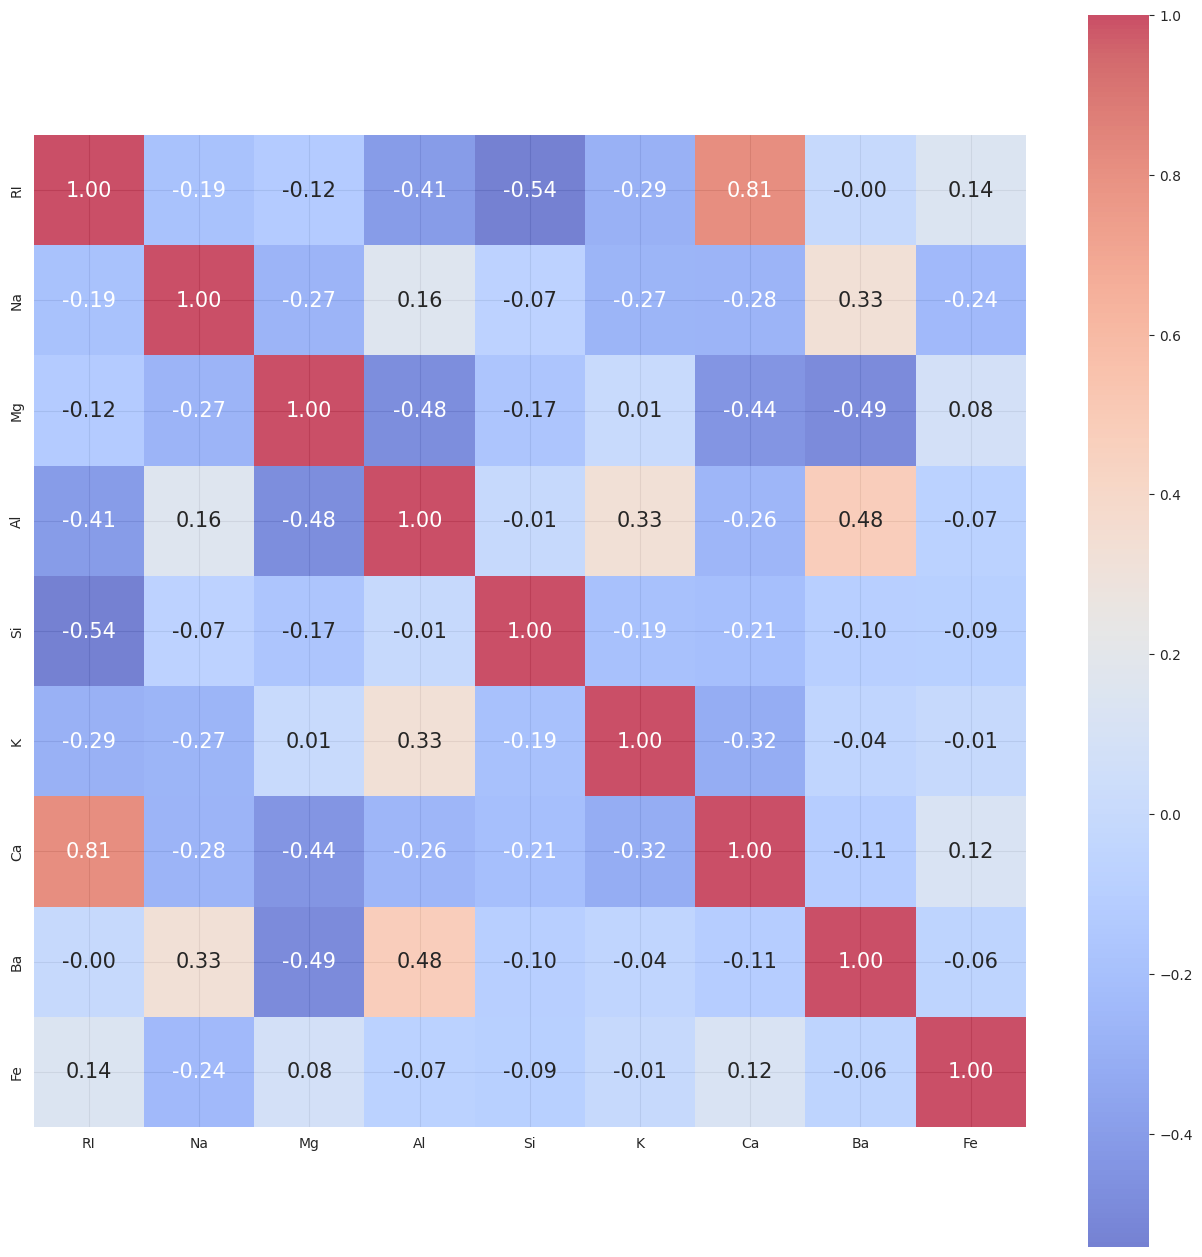

In [ ]:
#Heatmap
corr = df[features].corr()
plt.figure(figsize=(16,16))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features, yticklabels= features, alpha = 0.7,   cmap= 'coolwarm')
plt.show()

In [ ]:
Data preprocessing

SyntaxError: invalid syntax (<ipython-input-64-508c010037f6>, line 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [ ]:
outlier_indices = outlier_hunt(df[features])
df = df.drop(outlier_indices).reset_index(drop=True)
print(df.shape)

(200, 10)


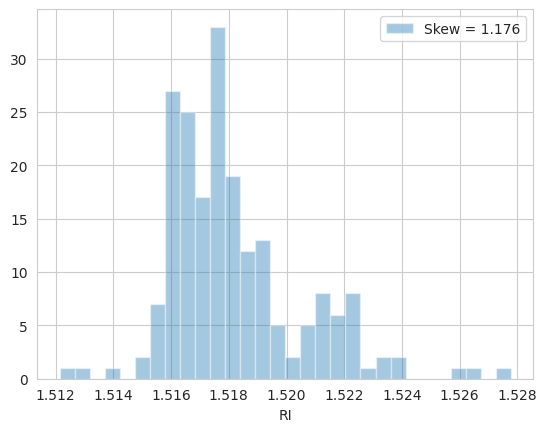

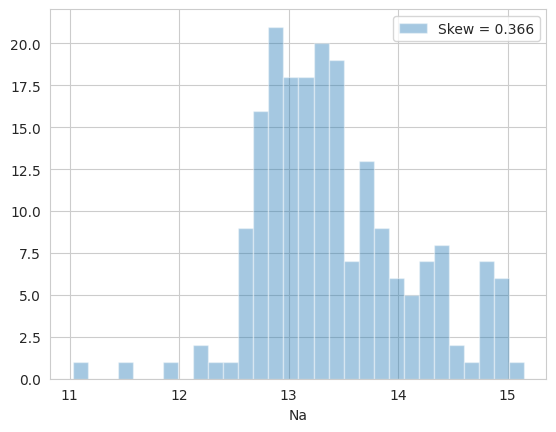

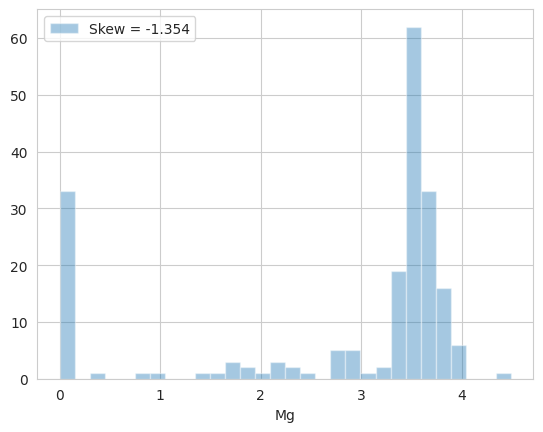

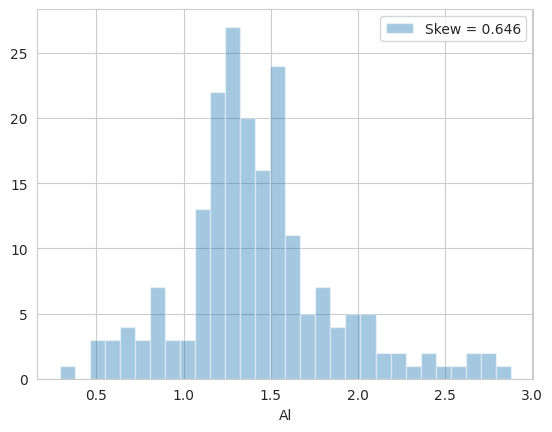

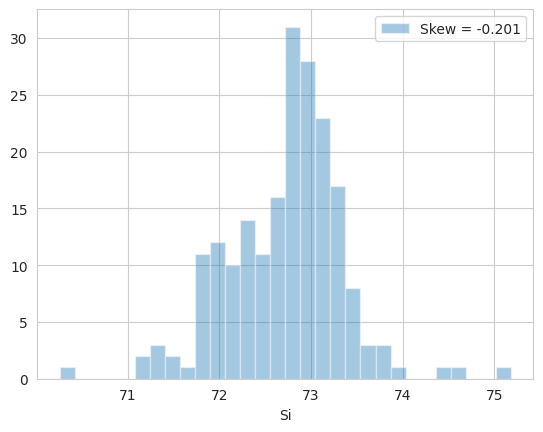

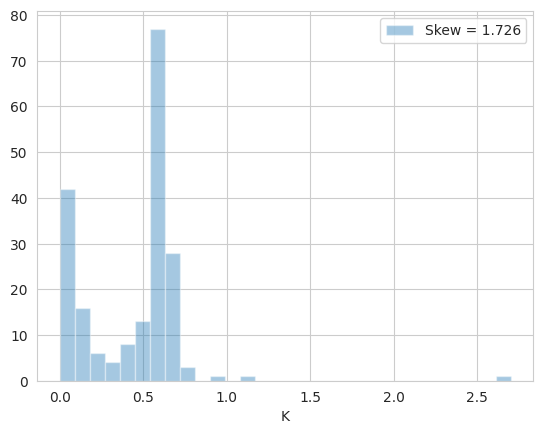

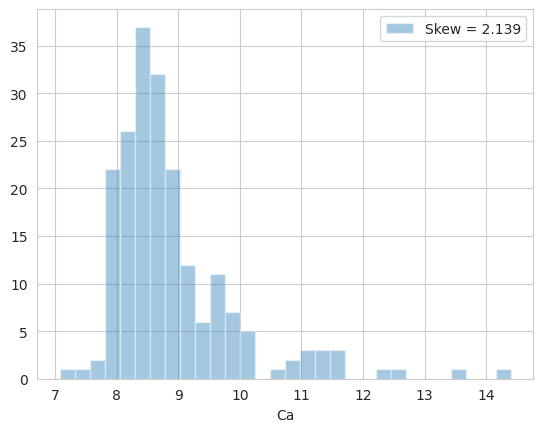

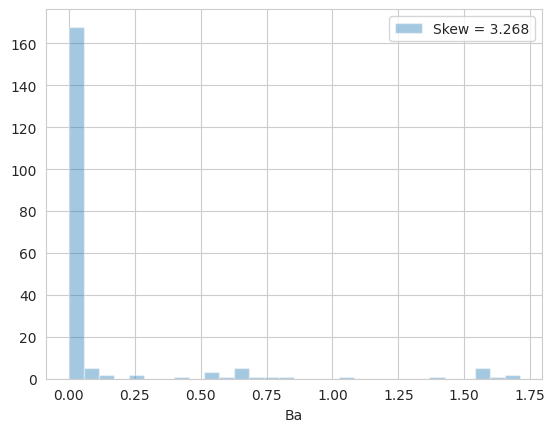

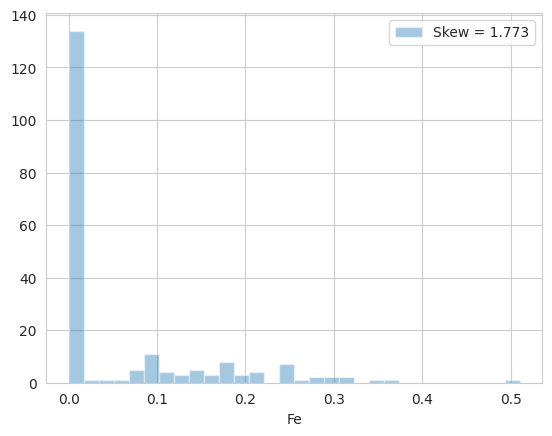

In [ ]:
for feat in features:
    skew = df[feat].skew()
    sns.distplot(df[feat], kde=False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

In [ ]:
df['Type'].value_counts()

,count
Type,
1,70
2,70
7,25
3,17
5,10
6,8


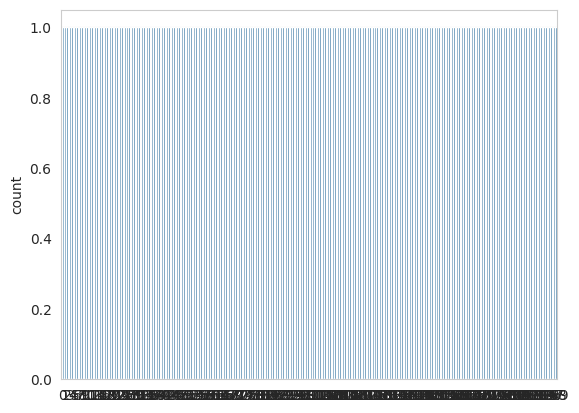

In [ ]:
sns.countplot(df['Type'])
plt.show()

In [ ]:
df['Type'].nunique()

6

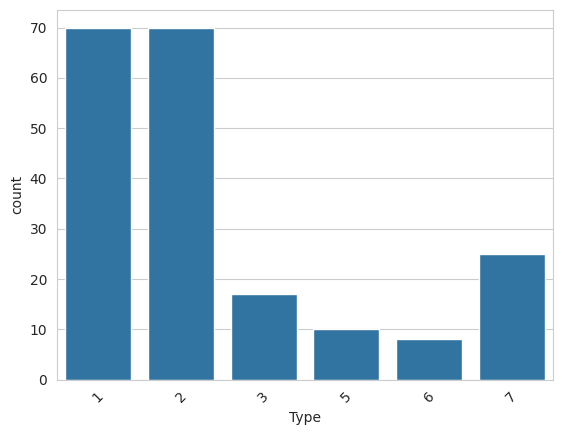

In [ ]:

top_categories = df['Type'].value_counts().nlargest(10).index
sns.countplot(data=df[df['Type'].isin(top_categories)], x='Type')
plt.xticks(rotation=45)
plt.show()


In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Type', data=df)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# Define X as features and y as lablels
X = df[features]
y = df['Type']
# set a seed and a test size for splitting the dataset
seed = 7
test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size , random_state = seed)

In [ ]:
#Transformasi Boxcox

features_boxcox = []

for feature in features:
    bc_transformed, _ = boxcox(df[feature]+1)  # shift by 1 to avoid computing log of negative values
    features_boxcox.append(bc_transformed)

features_boxcox = np.column_stack(features_boxcox)
df_bc = pd.DataFrame(data=features_boxcox, columns=features)
df_bc['Type'] = df['Type']

In [ ]:
df_bc.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,2.000000e+02,200.000000,200.000000,200.000000,2.000000e+02,200.000000,2.000000e+02,200.000000,200.000000,200.000000
mean,2.899816e-03,0.910643,14.813499,0.955244,6.067051e+09,0.342872,1.999249e-01,0.013377,0.019141,2.670000
std,5.651999e-18,0.003076,8.011922,0.217702,2.873462e+08,0.213507,8.577975e-07,0.031188,0.027757,2.054802
min,2.899816e-03,0.897962,0.000000,0.261374,5.004570e+09,0.000000,1.999215e-01,0.000000,0.000000,1.000000
25%,2.899816e-03,0.908540,10.569802,0.850076,5.893107e+09,0.122922,1.999244e-01,0.000000,0.000000,1.000000
50%,2.899816e-03,0.910269,18.555032,0.938477,6.106934e+09,0.447403,1.999248e-01,0.000000,0.000000,2.000000
75%,2.899816e-03,0.912445,19.835861,1.060851,6.238738e+09,0.480536,1.999254e-01,0.000000,0.051652,3.000000
max,2.899816e-03,0.917711,31.408315,1.561947,7.293050e+09,1.392148,1.999271e-01,0.091142,0.068796,7.000000


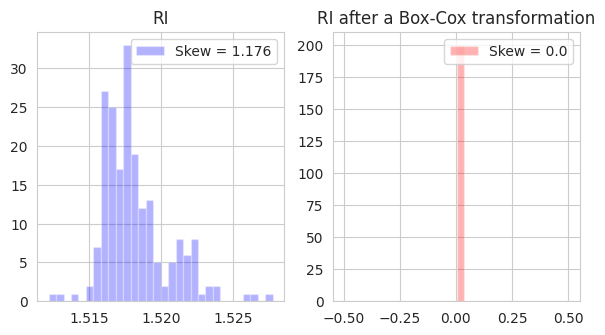

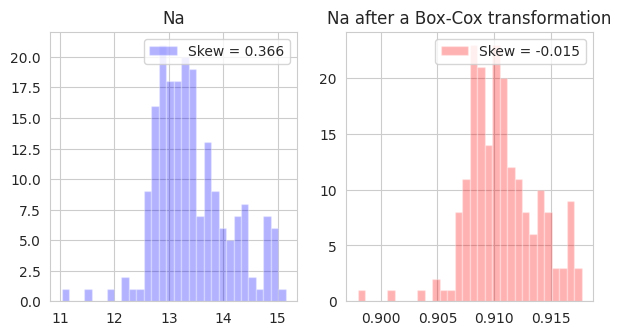

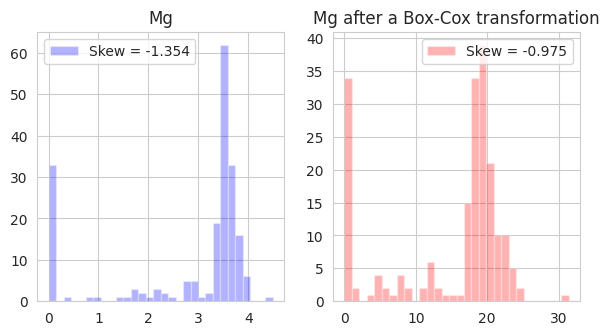

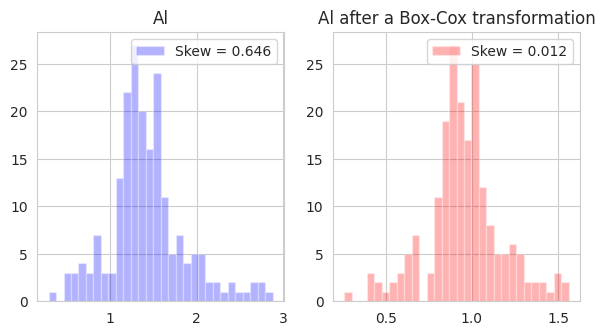

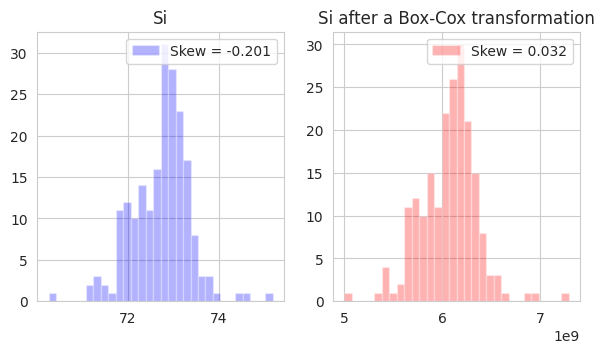

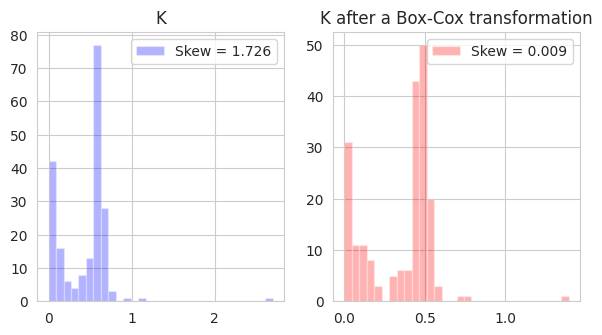

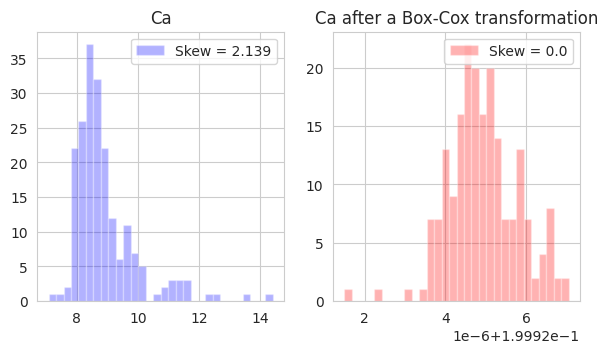

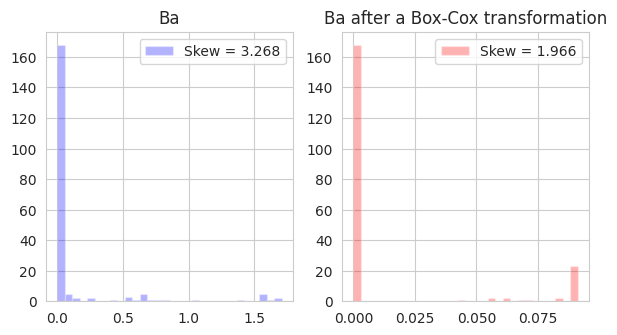

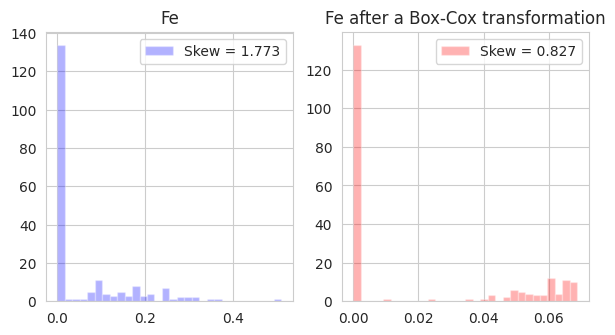

In [ ]:
for feature in features:
    fig, ax = plt.subplots(1,2,figsize=(7,3.5))
    ax[0].hist(df[feature], color='blue', bins=30, alpha=0.3, label='Skew = %s' %(str(round(df[feature].skew(),3))) )
    ax[0].set_title(str(feature))
    ax[0].legend(loc=0)
    ax[1].hist(df_bc[feature], color='red', bins=30, alpha=0.3, label='Skew = %s' %(str(round(df_bc[feature].skew(),3))) )
    ax[1].set_title(str(feature)+' after a Box-Cox transformation')
    ax[1].legend(loc=0)
    plt.show()

In [ ]:
# check if skew is closer to zero after a box-cox transform
for feature in features:
    delta = np.abs( df_bc[feature].skew() / df[feature].skew() )
    if delta < 1.0 :
        print('Feature %s tidak terlalu miring setelah dilakukan transformasi Box-Cox' %(feature))
    else:
        print('Feature %s lebih miring setelah dilakukan transformasi Box-Cox'  %(feature))

Feature RI tidak terlalu miring setelah dilakukan transformasi Box-Cox
Feature Na tidak terlalu miring setelah dilakukan transformasi Box-Cox
Feature Mg tidak terlalu miring setelah dilakukan transformasi Box-Cox
Feature Al tidak terlalu miring setelah dilakukan transformasi Box-Cox
Feature Si tidak terlalu miring setelah dilakukan transformasi Box-Cox
Feature K tidak terlalu miring setelah dilakukan transformasi Box-Cox
Feature Ca tidak terlalu miring setelah dilakukan transformasi Box-Cox
Feature Ba tidak terlalu miring setelah dilakukan transformasi Box-Cox
Feature Fe tidak terlalu miring setelah dilakukan transformasi Box-Cox


In [ ]:
Evaluasi Performa

In [ ]:
print(sorted(np.unique(y_train)))

[np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7)]


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

# lalu latih model pakai y_train_encoded
model_importances.fit(X_train, y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=0.1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)

Elapsed time to train XGBoost  0.195 seconds


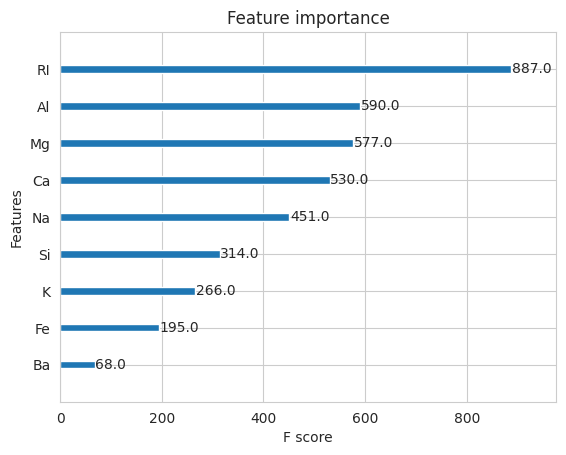

In [ ]:
#XGBOOST
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from xgboost import plot_importance
import matplotlib.pyplot as plt
from time import time

# Misal y_train berasal dari kolom Type
X = df.drop(columns='Type')
y = df['Type']

# Encode target label
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Training model
model_importances = XGBClassifier(n_jobs=-1, min_child_weight=0.1)
start = time()
model_importances.fit(X, y_encoded)
print('Elapsed time to train XGBoost  %.3f seconds' %(time()-start))

# Plot feature importances
plot_importance(model_importances)
plt.show()

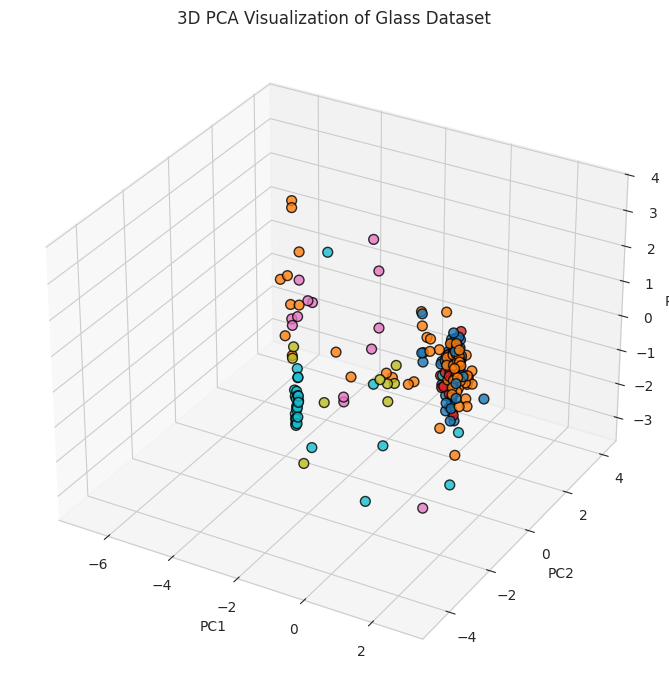

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load data
df = pd.read_csv("glass.csv")
X = df.drop(columns='Type')
y = df['Type']

# Lakukan PCA ke 3 komponen
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Plot 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],
                     c=y, cmap='tab10', s=50, edgecolor='k', alpha=0.8)

legend = ax.legend(*scatter.legend_elements(), title="Type", bbox_to_anchor=(1.05, 1), loc='upper left')
ax.add_artist(legend)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D PCA Visualization of Glass Dataset')
plt.tight_layout()
plt.show()

SVC: mean = 71.25%, median = 71.88%, std = 7.50%, time = 3.16s
LR: 67.500000 (+/- 4.677072) performed in 0.328043 seconds
KNN: mean = 66.25%, median = 65.62%, std = 8.00%, time = 0.29s
LR: 67.500000 (+/- 4.677072) performed in 0.328043 seconds
RF: mean = 78.12%, median = 78.12%, std = 6.40%, time = 4.20s
LR: 67.500000 (+/- 4.677072) performed in 0.328043 seconds
Ada: mean = 55.62%, median = 56.25%, std = 11.68%, time = 5.56s
LR: 67.500000 (+/- 4.677072) performed in 0.328043 seconds
ET: mean = 73.75%, median = 75.00%, std = 5.45%, time = 2.98s
LR: 67.500000 (+/- 4.677072) performed in 0.328043 seconds
GB: mean = 75.00%, median = 78.12%, std = 8.39%, time = 8.36s
LR: 67.500000 (+/- 4.677072) performed in 0.328043 seconds
LR: mean = 67.50%, median = 68.75%, std = 4.68%, time = 0.20s
LR: 67.500000 (+/- 4.677072) performed in 0.328043 seconds


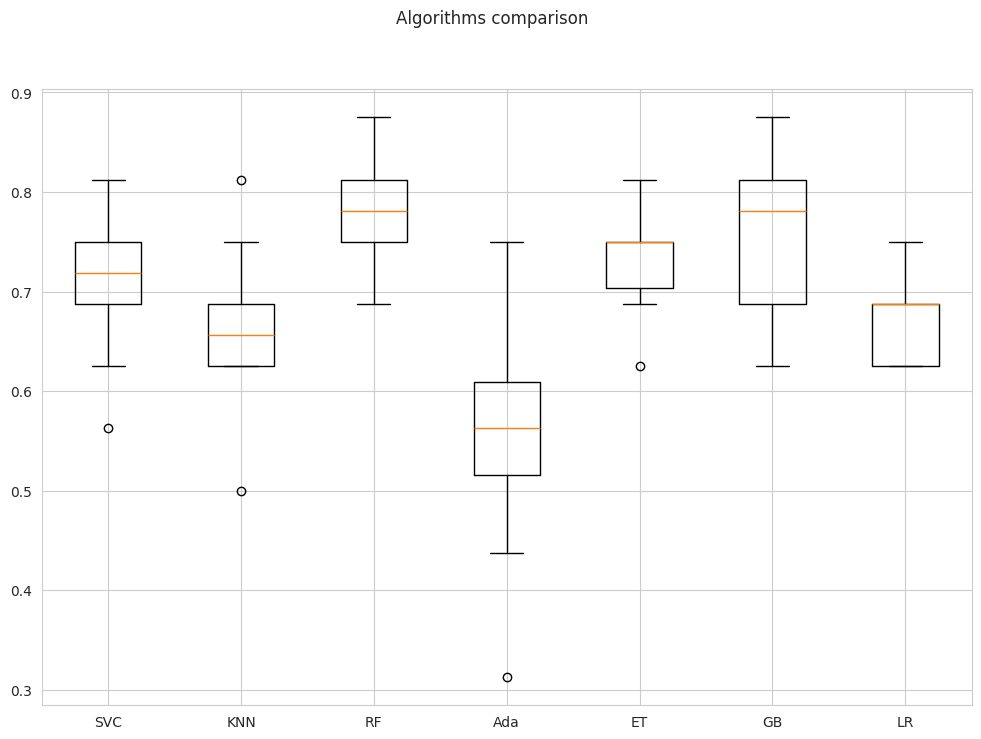

In [ ]:
n_components = 5
pipelines = []
n_estimators = 200

#print(df.shape)

pipelines.append( ('SVC',
                   Pipeline([
                              ('sc', RobustScaler()),
                             ('SVC', SVC(random_state=True))]) ) )


pipelines.append(('KNN',
                  Pipeline([
                              ('sc', RobustScaler()),
                            ('KNN', KNeighborsClassifier()) ])))
pipelines.append( ('RF',
                   Pipeline([
                             ('RF', RandomForestClassifier(random_state=None, n_estimators=n_estimators))
                   ]) ))


pipelines.append( ('Ada',
                   Pipeline([
                    ('Ada', AdaBoostClassifier(random_state=None,  n_estimators=n_estimators)) ]) ))

pipelines.append( ('ET',
                   Pipeline([
                             ('ET', ExtraTreesClassifier(random_state=None, n_estimators=n_estimators))
                   ]) ))
pipelines.append( ('GB',
                   Pipeline([
                             ('GB', GradientBoostingClassifier(random_state=None))
                   ]) ))

pipelines.append( ('LR',
                   Pipeline([
                              ('sc', RobustScaler()),
                             ('LR', LogisticRegression(random_state=None)) ]) ))

results, names, times  = [], [] , []
num_folds = 10
scoring = 'accuracy'

for name, model in pipelines:
    start = time()
    kfold = StratifiedKFold(n_splits=num_folds, random_state=None)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy', n_jobs=-1)
    t_elapsed = time() - start
    results.append(cv_results)
    names.append(name)
    times.append(t_elapsed)
    print(f"{name}: mean = {100*cv_results.mean():.2f}%, median = {100*np.median(cv_results):.2f}%, std = {100*cv_results.std():.2f}%, time = {t_elapsed:.2f}s")
    print(msg)


fig = plt.figure(figsize=(12,8))
fig.suptitle("Algorithms comparison")
ax = fig.add_subplot(1,1,1)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
# Create a pipeline with a Random forest classifier
pipe_rfc = Pipeline([
    ('rfc', RandomForestClassifier(random_state=None, n_jobs=-1) )
])

# Set the grid parameters
param_grid_rfc =[{
    'rfc__n_estimators': [50, 100, 150], # number of estimators
    'rfc__max_features':[0.1, 0.2 , 0.3], # maximum features used at each split
    'rfc__max_depth': [5,], # Max depth of the trees
    'rfc__min_samples_split': [0.12, 0.15, 0.2], # mininal samples in leafs
}]

# Use 10 fold CV
kfold = StratifiedKFold(n_splits=num_folds, random_state= None)
grid_rfc = GridSearchCV(
    pipe_rfc,
    param_grid=
    param_grid_rfc,
    cv=kfold,
    scoring=scoring,
    verbose= 1,
    n_jobs=-1
)

#Fit the pipeline
start = time()
grid_rfc = grid_rfc.fit(X_train, y_train)
end = time()

print("RFC grid search took %.3f seconds" %(end-start))

# Best score and best parameters
print('-------Best score----------')
print(grid_rfc.best_score_ * 100.0)
print('-------Best params----------')
print(grid_rfc.best_params_)

Fitting 10 folds for each of 27 candidates, totalling 270 fits
RFC grid search took 56.719 seconds
-------Best score----------
71.25
-------Best params----------
{'rfc__max_depth': 5, 'rfc__max_features': 0.3, 'rfc__min_samples_split': 0.12, 'rfc__n_estimators': 50}


In [ ]:
# Let's define some utility functions to plot the learning & validation curves

def plot_learning_curve(train_sizes, train_scores, test_scores, title, alpha=0.1):
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.plot(train_sizes, train_mean, label='train score', color='blue', marker='o')
    plt.fill_between(train_sizes,train_mean + train_std,
                    train_mean - train_std, color='blue', alpha=alpha)
    plt.plot(train_sizes, test_mean, label='test score', color='red',marker='o')
    plt.fill_between(
        train_sizes,test_mean + test_std,
        test_mean - test_std ,
        color='red', alpha=alpha
    )
    plt.title(title)
    plt.xlabel('Number of training points')
    plt.ylabel('Accuracy')
    plt.grid(ls='--')
    plt.legend(loc='best')
    plt.show()

def plot_validation_curve(param_range, train_scores, test_scores, title, alpha=0.1):
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.plot(param_range, train_mean, label='train score', color='blue', marker='o')
    plt.fill_between(param_range,train_mean + train_std,
                    train_mean - train_std, color='blue', alpha=alpha)
    plt.plot(param_range, test_mean, label='test score', color='red', marker='o')
    plt.fill_between(
        param_range,test_mean + test_std, test_mean - test_std ,
        color='red', alpha=alpha
    )
    plt.title(title)
    plt.grid(ls='--')
    plt.xlabel('Parameter value')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.show()

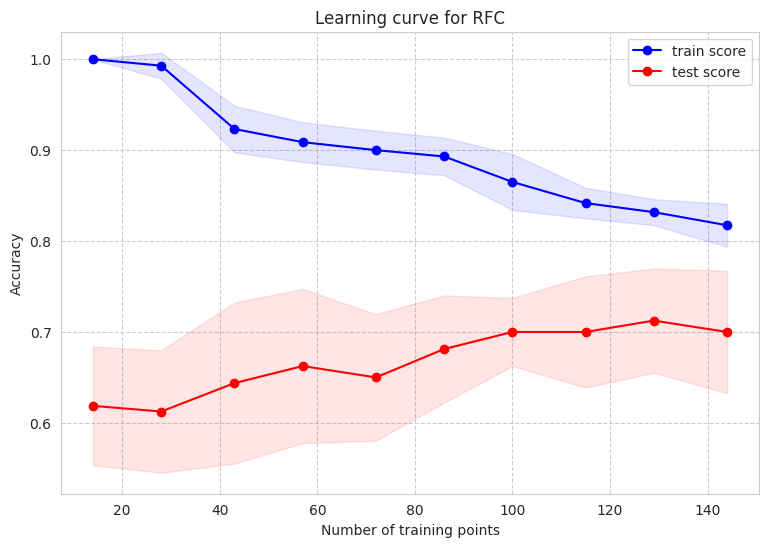

In [ ]:
plt.figure(figsize=(9,6))

train_sizes, train_scores, test_scores = learning_curve(
    estimator= grid_rfc.best_estimator_ ,
    X= X_train, y = y_train,
    train_sizes=np.arange(0.1,1.1,0.1),
    cv= 10,
    scoring='accuracy',
    n_jobs= - 1)

plot_learning_curve(train_sizes, train_scores, test_scores, title='Learning curve for RFC')

Train Accuracy: 1.0
Test Accuracy: 0.8461538461538461

Classification Report:
               precision    recall  f1-score   support

           1       0.87      0.95      0.91        21
           2       0.86      0.83      0.84        23
           3       1.00      0.60      0.75         5
           5       0.60      0.75      0.67         4
           6       1.00      0.67      0.80         3
           7       0.80      0.89      0.84         9

    accuracy                           0.85        65
   macro avg       0.86      0.78      0.80        65
weighted avg       0.86      0.85      0.84        65



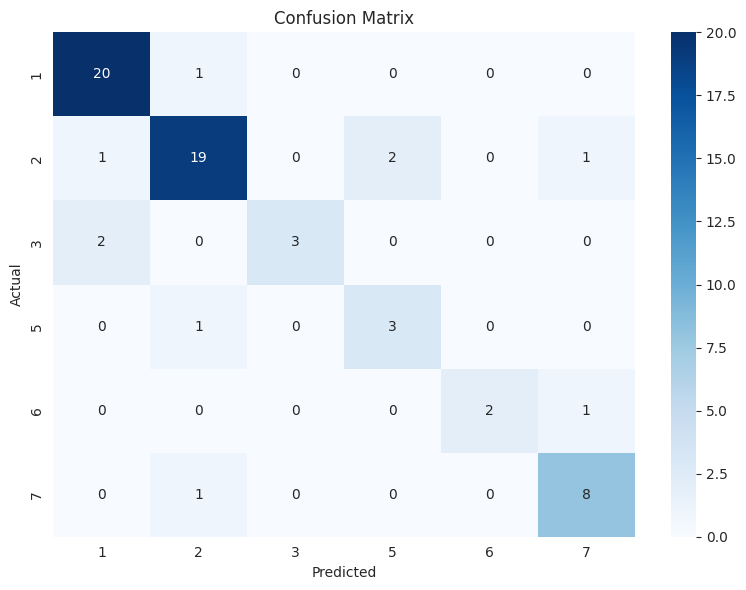

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Pilih fitur penting
important_features = ['RI', 'Na', 'Mg', 'Al', 'Ca']
X = df[important_features]
y = df['Type']

# Split data dengan stratifikasi
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Buat model dan latih
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluasi model
y_pred = model.predict(X_test)
print("Train Accuracy:", model.score(X_train, y_train))
print("Test Accuracy:", model.score(X_test, y_test))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Visualisasi confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

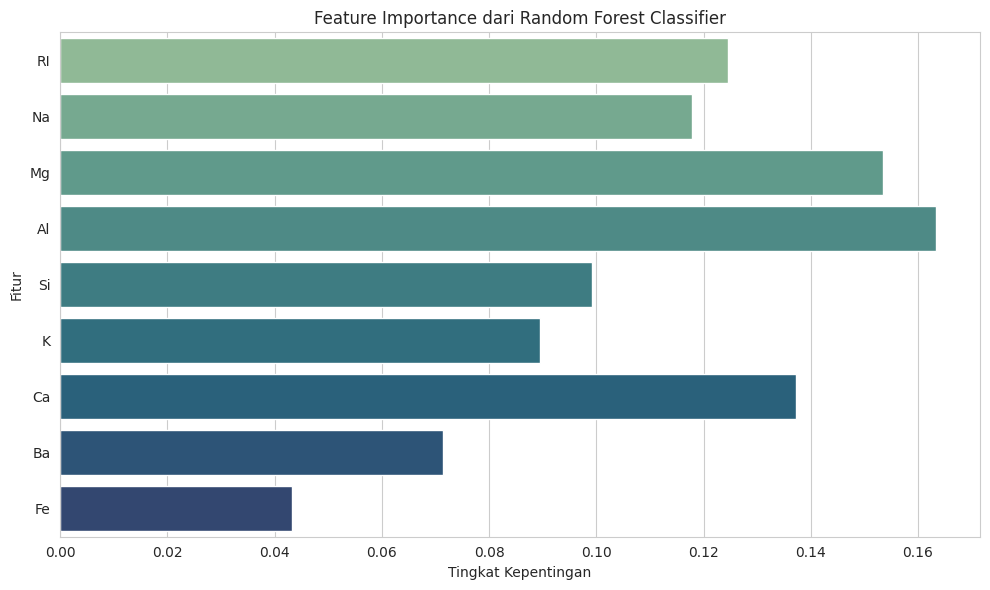

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Pisahkan fitur dan target
X = df.drop(columns='Type')
y = df['Type']

# Bagi data (pakai stratifikasi agar distribusi kelas tetap)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Buat dan latih model Random Forest
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

# Ambil pentingnya fitur
importances = rfc.feature_importances_
features = X.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features, palette="crest")
plt.title("Feature Importance dari Random Forest Classifier")
plt.xlabel("Tingkat Kepentingan")
plt.ylabel("Fitur")
plt.tight_layout()
plt.show()